In [7]:
import model
from tune import ModelTune

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

#from imblearn.under_sampling import NearMiss
#from imblearn.combine import SMOTETomek

In [2]:
clean_tf = pd.read_csv('cleaned_tf.csv', index_col='respondent_id')
clean_tl = pd.read_csv('cleaned_tl.csv', index_col='respondent_id')

In [101]:
np.testing.assert_array_equal(clean_tf.index.values, clean_tl.index.values)
train_df = pd.concat([clean_tf, clean_tl], axis=1)

In [3]:
h1n1 = pd.read_csv('cleaned_tl.csv', usecols=['respondent_id', 'h1n1_vaccine'], index_col='respondent_id')
seasonal = pd.read_csv('cleaned_tl.csv', usecols=['respondent_id', 'seasonal_vaccine'], index_col='respondent_id')

***** Logistic Regression *****


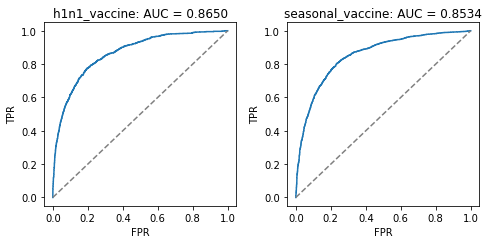

In [4]:
print("***** Logistic Regression *****")
estimator = MultiOutputClassifier(estimator = LogisticRegression())
model.fit_and_estimate(clean_tf, clean_tl, estimator, multiLabel=True)

***** K Neighbors Classifier *****


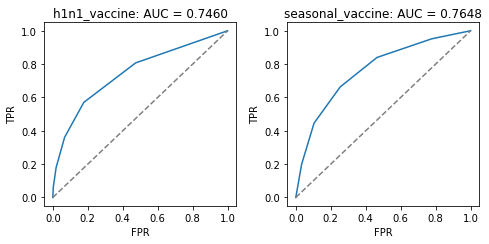

In [5]:
print("***** K Neighbors Classifier *****")
estimator = MultiOutputClassifier(estimator = KNeighborsClassifier())
model.fit_and_estimate(clean_tf, clean_tl, estimator, multiLabel=True)

***** Decision Tree Classifier *****


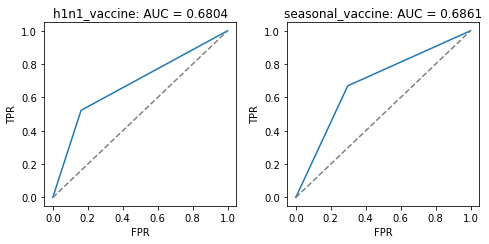

In [13]:
print("***** Decision Tree Classifier *****")
estimator = MultiOutputClassifier(estimator = DecisionTreeClassifier())
model.fit_and_estimate(clean_tf, clean_tl, estimator, multiLabel=True)

***** Naive Bayes *****


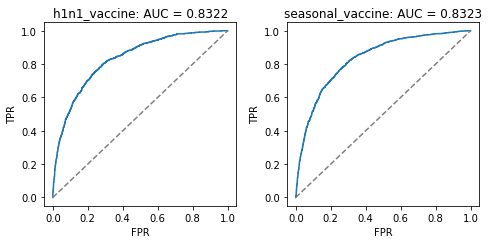

In [15]:
print("***** Naive Bayes *****")
estimator = MultiOutputClassifier(estimator = CategoricalNB())
model.fit_and_estimate(clean_tf, clean_tl, estimator, multiLabel=True, scaler="MinMax")

``` CategoricalNB ```gave an error for having negative values. Hence used MinMax Scaler.

***** Random Forest Classifier *****


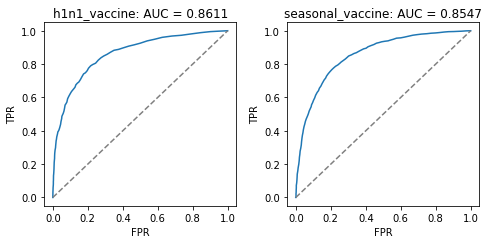

In [19]:
print("***** Random Forest Classifier *****")
estimator = MultiOutputClassifier(estimator = RandomForestClassifier())
model.fit_and_estimate(clean_tf, clean_tl, estimator, multiLabel=True)

***** Gradient Boosting Classifier *****


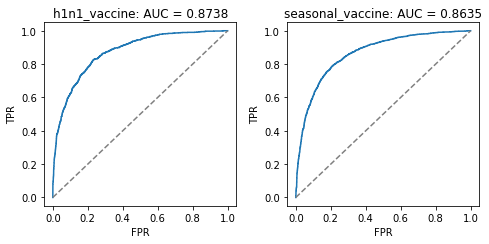

In [21]:
print("***** Gradient Boosting Classifier *****")
estimator = MultiOutputClassifier(estimator = GradientBoostingClassifier())
model.fit_and_estimate(clean_tf, clean_tl, estimator, multiLabel=True)

***** AdaBoost Classifier *****


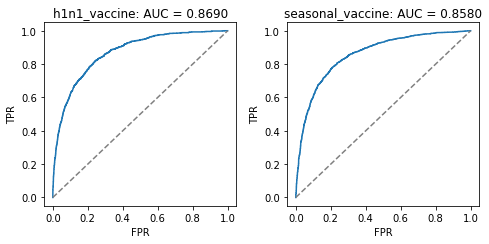

In [23]:
print("***** AdaBoost Classifier *****")
estimator = MultiOutputClassifier(estimator = AdaBoostClassifier())
model.fit_and_estimate(clean_tf, clean_tl, estimator, multiLabel=True)

***** XGBoost Classifier *****


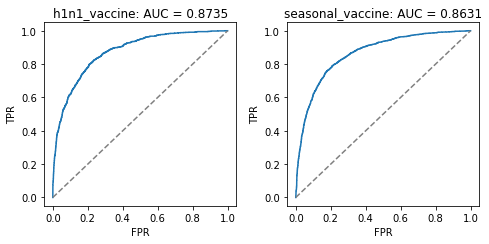

In [6]:
print("***** XGBoost Classifier *****")
estimator = MultiOutputClassifier(estimator = XGBClassifier())
model.fit_and_estimate(clean_tf, clean_tl, estimator, multiLabel=True)

# Single Target Method

## Target : h1n1_vaccine

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64
event rate: 21.24536638334519 %


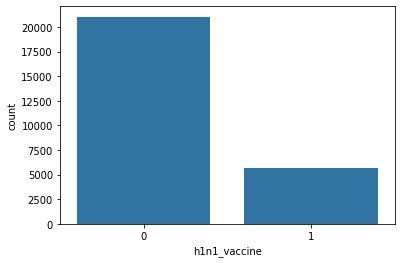

In [78]:
v = h1n1['h1n1_vaccine'].value_counts()
print(v)
print('event rate:', 100*v[1]/(v[0]+v[1]),'%')
sb.countplot(x='h1n1_vaccine', data=h1n1, color=sb.color_palette()[0]);

#### Case 1 : Imbalanced Data - Without Model Tuning

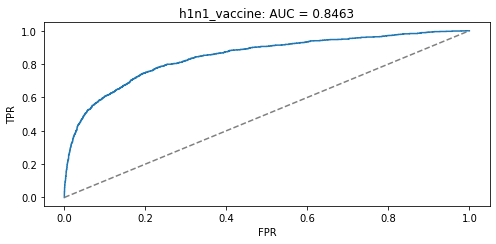

In [4]:
estimator = LogisticRegression()
model.fit_and_estimate(clean_tf, h1n1, estimator,label='h1n1_vaccine')

#### Case 2 : Imbalanced Data - With parameter Tuning

*********** Gradient Boosting Classifier ***********
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


Accuracy during search - : 0.858


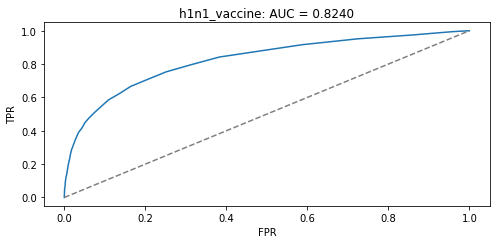

In [4]:
import model
from tune import ModelTune
estimator = ModelTune(clean_tf, h1n1).knn()
model.fit_and_estimate(clean_tf, h1n1, estimator, label='h1n1_vaccine')

#### Case 3 : Balanced Data - without tuning

(9078, 45) (9078, 1)


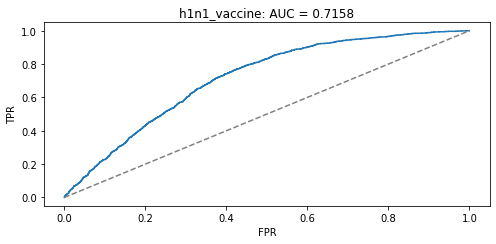

In [14]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
X_res, y_res = nm.fit_sample(X_train, y_train)
print(X_res.shape, y_res.shape)

estimator = LogisticRegression()
fit_and_estimate(X_res, y_res, X_eval, y_eval, estimator, label='h1n1_vaccine')

(33608, 45) (33608, 1)


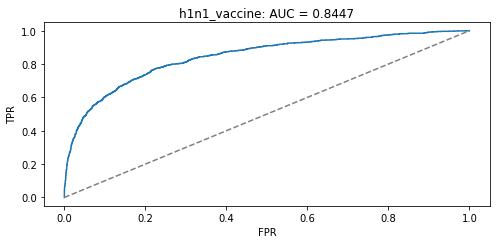

In [15]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
X_res, y_res = smk.fit_sample(X_train, y_train)
print(X_res.shape, y_res.shape)

estimator = LogisticRegression()
fit_and_estimate(X_res, y_res, X_eval, y_eval, estimator, label='h1n1_vaccine')

(33652, 45) (33652, 1)


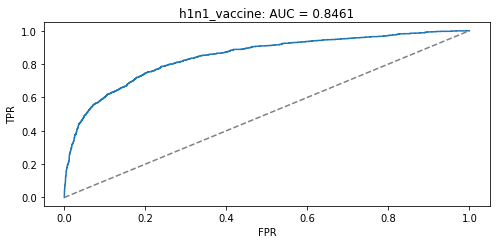

In [16]:
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()

X_res, y_res = os.fit_sample(X_train, y_train)

print(X_res.shape,y_res.shape)

estimator = LogisticRegression()
fit_and_estimate(X_res, y_res, X_eval, y_eval, estimator, label='h1n1_vaccine')

#### Case 4 : Balanced Data - with tuning

(9078, 45) (9078, 1)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.1s finished


Accuracy - : 0.901


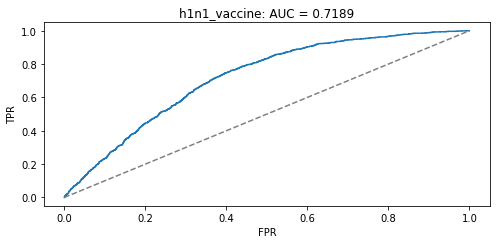

In [62]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
X_res, y_res = nm.fit_sample(X_train, y_train)
print(X_res.shape, y_res.shape)

estimator = tune(X_res, y_res).logreg()
fit_and_estimate(X_res, y_res, X_eval, y_eval, estimator, label='h1n1_vaccine')

(33606, 45) (33606, 1)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    4.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.3s finished


Accuracy - : 0.875


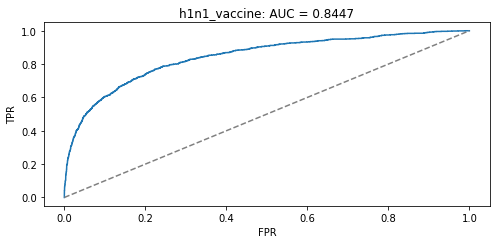

In [63]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
X_res, y_res = smk.fit_sample(X_train, y_train)
print(X_res.shape, y_res.shape)

estimator = tune(X_res, y_res).logreg()
fit_and_estimate(X_res, y_res, X_eval, y_eval, estimator, label='h1n1_vaccine')

(33652, 45) (33652, 1)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    4.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.4s finished


Accuracy - : 0.860


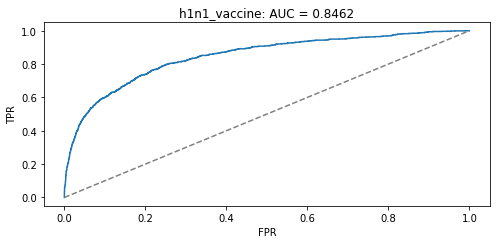

In [64]:
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()

X_res, y_res = os.fit_sample(X_train, y_train)

print(X_res.shape,y_res.shape)

estimator = tune(X_res, y_res).logreg()
fit_and_estimate(X_res, y_res, X_eval, y_eval, estimator, label='h1n1_vaccine')

**Findings:** From above 4 cases, Imbalanced Data with hyperparameter tuning is perfrming better.

## Target : seasonal_vaccine

In [65]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(clean_tf.values)

X_train, X_eval, y_train, y_eval = train_test_split(
    X,
    seasonal,
    test_size=0.20,
    shuffle=True,
    stratify=seasonal,
    random_state=0
)

#### Without tuning:

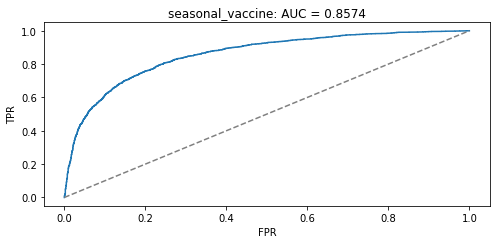

In [66]:
estimator = LogisticRegression()
fit_and_estimate(X_train, y_train, X_eval, y_eval, estimator, label='seasonal_vaccine')

#### With tuning

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.6s finished


Accuracy - : 0.851


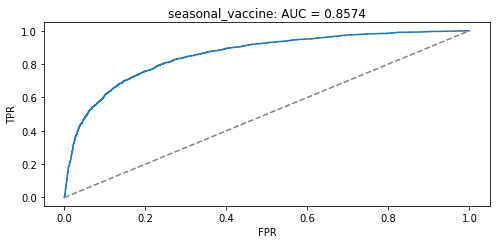

In [67]:
estimator = tune(X_train, y_train).logreg()
fit_and_estimate(X_train, y_train, X_eval, y_eval, estimator, label='seasonal_vaccine')